# Instalación de librerias


In [2]:
!pip install rapidfuzz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 19.9 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import re
import unicodedata
from rapidfuzz import process, fuzz

import seaborn as sns

In [4]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


# Funciones

In [64]:
def eliminar_tildes(texto):
  texto = unicodedata.normalize('NFD', texto)
  texto = re.sub(r'(?i)[\u0301\u0308]', '', texto)
  return unicodedata.normalize('NFC', texto)

def imputar_moda(group):
    mode_value = group.mode().iloc[0] if not group.mode().empty else None
    return group.fillna(mode_value)

def imputar_mediana(group):
    median_value = group.median() if not group.empty else None
    return group.fillna(median_value)

# Importar data

In [52]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Pruebas Ciencia de Datos & Datasets/Vanti/data_challenge.csv')
viviendas = pd.read_excel('/content/drive/MyDrive/Pruebas Ciencia de Datos & Datasets/Vanti/anexo-proyecciones-viviendas-dptal-2018-2050.xlsx', skiprows=10, sheet_name='Proye viviendas ocupadas mpio')


In [53]:
anios = list(range(2018, 2036))

In [54]:
display(df.head(5))
display(df.shape)

,cuenta,fec_contab_documento,consumo,categoria_cliente,porcion,dias_fact,descrip_poblac_suministro
0,AATHHM6d7TyIT1ubMnB14A==,2023-04-22,0.0,60,P14,33,BOGOTA
1,AATHHM6d7TyIT1ubMnB14A==,2023-05-23,0.0,60,P14,27,BOGOTA
2,AATHHM6d7TyIT1ubMnB14A==,2023-06-23,0.0,60,P14,33,BOGOTA
3,AATHHM6d7TyIT1ubMnB14A==,2023-07-22,0.0,60,P14,27,BOGOTA
4,AATHHM6d7TyIT1ubMnB14A==,2023-08-23,0.0,60,P14,29,BOGOTA


(108895, 7)

In [55]:
columnas_viviendas = ['codigo_dpto', 'nombre_dpto', 'codigo_municipio', 'nombre_municipio', 'area'] + anios
viviendas.columns = columnas_viviendas

In [10]:
df['descrip_poblac_suministro'].unique()

array(['BOGOTA', 'BUCARAMANGA', 'CHIA', 'GIRON', 'BARRANCABERMEJA',
       'LA JAGUA DE IBIRIC', 'SOACHA', 'ZIPAQUIRA', 'PIEDECUESTA',
       'DUITAMA', 'SOGAMOSO', 'MOSQUERA', 'SAN ALBERTO', 'TUNJA',
       'CHIQUINQUIRA', 'MADRID', 'CAJICA', 'FUNZA', 'SAN PABLO',
       'AGUACHICA', 'FLORIAN', 'PELAYA', 'PAILITAS', 'CURUMANI',
       'FACATATIVA', 'NOBSA', 'NEMOCON', 'TOCANCIPA', 'BELEN', 'SOPO',
       'SAMACA', 'PAIPA', 'GACHANCIPA', 'FLORIDABLANCA',
       'S. ROSA DE VITERBO', 'EL BANCO', 'LA MESA', 'TABIO', 'EL ROSAL',
       'PUERTO WILCHES', 'ANAPOIMA', 'CANTAGALLO', 'S DE TORRES', 'COTA',
       'VIOTA', 'BOJACA', 'CHIRIGUANA', 'LEBRIJA', 'SANTA SOFIA', 'TENJO',
       'SACHICA', 'LA GLORIA', 'CASACARA', 'BECERRIL', 'AGUSTIN CODAZZI',
       'LA CALERA', 'COGUA', 'EL COLEGIO', 'UBATE', 'PTE.SOGAMOSO',
       'SIBATE', 'OICATA', 'SAN DIEGO', 'SABANAGRANDE', 'EL PEDRAL',
       'VILLA DE LEYVA', 'GAMARRA', 'EL LLANITO', 'TUTA', 'YONDO',
       'RINCON HONDO', 'COMBITA', 'TINJAC

In [56]:
viviendas['nombre_municipio'] = viviendas['nombre_municipio'].str.upper()
viviendas['nombre_municipio'] = viviendas['nombre_municipio'].apply(eliminar_tildes)

reemplazos_municipio = {'BOGOTA, D.C.':'BOGOTA', 'LA JAGUA DE IBIRIC':'LA JAGUA DE IBIRICO',
                        'S. ROSA DE VITERBO': 'SANTA ROSA DE VITERBO', 'S DE TORRES': 'SABANA DE TORRES',
                        }
viviendas['nombre_municipio'].replace(reemplazos_municipio, inplace=True)


<ipython-input-56-468c98e87e55>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  viviendas['nombre_municipio'].replace(reemplazos_municipio, inplace=True)


In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
cuenta,108895,8000,AATHHM6d7TyIT1ubMnB14A==,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fec_contab_documento,108895,297,2024-02-12,860,NaN,NaN,NaN,NaN,NaN,NaN,NaN
consumo,108895.0,NaN,NaN,NaN,23.852588,495.513117,0.0,5.0,11.0,19.0,60061.0
categoria_cliente,108895.0,NaN,NaN,NaN,27.748501,13.469137,10.0,20.0,30.0,30.0,160.0
porcion,100973,24,P02,6075,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dias_fact,108895.0,NaN,NaN,NaN,29.588365,1.686468,3.0,29.0,30.0,31.0,67.0
descrip_poblac_suministro,108895,93,BOGOTA,68308,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
consumo,108895.0,23.852588,495.513117,0.0,5.0,11.0,19.0,60061.0
categoria_cliente,108895.0,27.748501,13.469137,10.0,20.0,30.0,30.0,160.0
dias_fact,108895.0,29.588365,1.686468,3.0,29.0,30.0,31.0,67.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108895 entries, 0 to 108894
Data columns (total 7 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   cuenta                     108895 non-null  object 
 1   fec_contab_documento       108895 non-null  object 
 2   consumo                    108895 non-null  float64
 3   categoria_cliente          108895 non-null  int64  
 4   porcion                    100973 non-null  object 
 5   dias_fact                  108895 non-null  int64  
 6   descrip_poblac_suministro  108895 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 5.8+ MB


In [ ]:
df.descrip_poblac_suministro.value_counts(dropna=False)

,count
descrip_poblac_suministro,
BOGOTA,68308
SOACHA,7422
BUCARAMANGA,5130
TUNJA,2124
BARRANCABERMEJA,1735
...,...
FLORIAN,14
SABANAGRANDE,14
BRICENO,14


In [ ]:
df.categoria_cliente.value_counts(dropna=False)

,count
categoria_cliente,
20,37155
30,36432
10,13605
40,13419
50,3333
60,2564
80,2297
87,39
85,32


In [ ]:
df.porcion.value_counts(dropna=False)

,count
porcion,
NaN,7922
P02,6075
P05,5972
P08,5962
P06,5927
P04,5904
P10,5879
P09,5822
P03,5748


# merge nueva data

In [ ]:
viviendas.columns

Index([     'codigo_dpto',      'nombre_dpto', 'codigo_municipio',
       'nombre_municipio',             'area',               2018,
                     2019,               2020,               2021,
                     2022,               2023,               2024,
                     2025,               2026,               2027,
                     2028,               2029,               2030,
                     2031,               2032,               2033,
                     2034,               2035],
      dtype='object')

In [57]:
df['año'] = pd.to_datetime(df['fec_contab_documento']).dt.year.astype(str)
df

,cuenta,fec_contab_documento,consumo,categoria_cliente,porcion,dias_fact,descrip_poblac_suministro,año
0,AATHHM6d7TyIT1ubMnB14A==,2023-04-22,0.0,60,P14,33,BOGOTA,2023
1,AATHHM6d7TyIT1ubMnB14A==,2023-05-23,0.0,60,P14,27,BOGOTA,2023
2,AATHHM6d7TyIT1ubMnB14A==,2023-06-23,0.0,60,P14,33,BOGOTA,2023
3,AATHHM6d7TyIT1ubMnB14A==,2023-07-22,0.0,60,P14,27,BOGOTA,2023
4,AATHHM6d7TyIT1ubMnB14A==,2023-08-23,0.0,60,P14,29,BOGOTA,2023
...,...,...,...,...,...,...,...,...
108890,//zeLQj06uUX0jXMTus/VA==,2024-01-09,15.0,20,P03,30,BOGOTA,2024
108891,//zeLQj06uUX0jXMTus/VA==,2024-02-07,15.0,20,P03,29,BOGOTA,2024
108892,//zeLQj06uUX0jXMTus/VA==,2024-03-06,15.0,20,P03,29,BOGOTA,2024
108893,//zeLQj06uUX0jXMTus/VA==,2024-04-05,15.0,20,P03,30,BOGOTA,2024


In [58]:
viviendas = viviendas[viviendas['area']=='Total']

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108895 entries, 0 to 108894
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   cuenta                     108895 non-null  object 
 1   fec_contab_documento       108895 non-null  object 
 2   consumo                    108895 non-null  float64
 3   categoria_cliente          108895 non-null  int64  
 4   porcion                    100973 non-null  object 
 5   dias_fact                  108895 non-null  int64  
 6   descrip_poblac_suministro  108895 non-null  object 
 7   año                        108895 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 6.6+ MB


In [59]:
viviendas_unpivot = viviendas[['nombre_municipio', 2019, 2020, 2021, 2022, 2023, 2024]].melt(id_vars=['nombre_municipio'], var_name='año', value_name='viviendas')
viviendas_unpivot['año'] = viviendas_unpivot['año'].astype(str)

In [60]:
df_merged = df.merge(viviendas_unpivot,
                     left_on=['descrip_poblac_suministro', 'año'],
                     right_on=['nombre_municipio', 'año'],
                     how='left').drop(columns=['nombre_municipio'])

In [61]:
df_merged['porcion'] = df_merged['porcion'].str.replace(r'\|', '', regex=True)
df_merged['porcion'] = df_merged['porcion'].str.replace(r'I', '', regex=True)


In [62]:
moda_fill_grupo = df_merged.groupby(['categoria_cliente', 'descrip_poblac_suministro'])['porcion'].transform(lambda x: x.mode()[0] if not x.mode().empty else None)
moda_fill_ciudad = df_merged.groupby('descrip_poblac_suministro')['porcion'].transform(lambda x: x.mode()[0] if not x.mode().empty else None)
df_merged['porcion'] = df_merged['porcion'].fillna(moda_fill_grupo)
df_merged['porcion'] = df_merged['porcion'].fillna(moda_fill_ciudad)

In [77]:
df_merged['viviendas'] = df_merged['viviendas'].fillna(df_merged['viviendas'].median())


In [71]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110609 entries, 0 to 110608
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   cuenta                     110609 non-null  object 
 1   fec_contab_documento       110609 non-null  object 
 2   consumo                    110609 non-null  float64
 3   categoria_cliente          110609 non-null  int64  
 4   porcion                    110609 non-null  object 
 5   dias_fact                  110609 non-null  int64  
 6   descrip_poblac_suministro  110609 non-null  object 
 7   año                        110609 non-null  object 
 8   viviendas                  109321 non-null  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 7.6+ MB


In [51]:
df_merged[df_merged['descrip_poblac_suministro']=='SOACHA']['porcion'].unique()

array(['P05', 'P10', 'P09', 'P12', 'P18', 'P11', 'P03', 'P16', 'P14',
       'P01', 'Desconocido', 'P07'], dtype=object)

<Axes: xlabel='porcion', ylabel='consumo'>

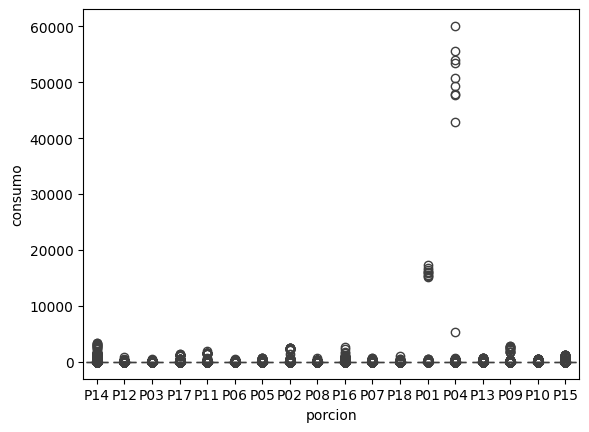

In [80]:
sns.boxplot(x='porcion', y='consumo', data=df_merged)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92],
 [Text(0, 0, 'BOGOTA'),
  Text(1, 0, 'BUCARAMANGA'),
  Text(2, 0, 'CHIA'),
  Text(3, 0, 'GIRON'),
  Text(4, 0, 'BARRANCABERMEJA'),
  Text(5, 0, 'LA JAGUA DE IBIRIC'),
  Text(6, 0, 'SOACHA'),
  Text(7, 0, 'ZIPAQUIRA'),
  Text(8, 0, 'PIEDECUESTA'),
  Text(9, 0, 'DUITAMA'),
  Text(10, 0, 'SOGAMOSO'),
  Text(11, 0, 'MOSQUERA'),
  Text(12, 0, 'SAN ALBERTO'),
  Text(13, 0, 'TUNJA'),
  Text(14, 0, 'CHIQUINQUIRA'),
  Text(15, 0, 'MADRID'),
  Text(16, 0, '

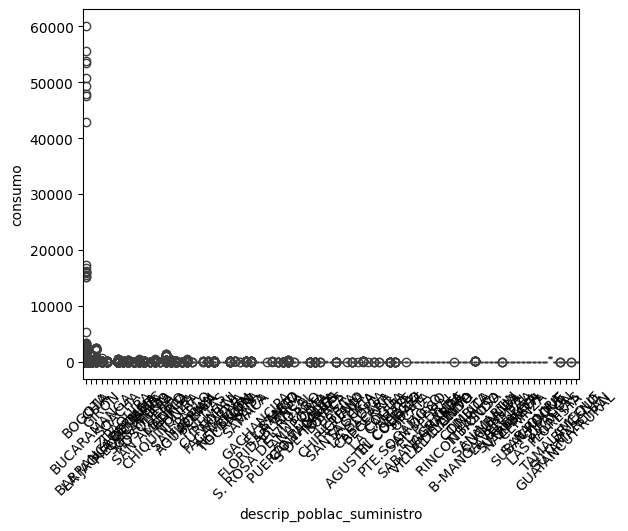

In [83]:
import matplotlib.pyplot as plt
sns.boxplot(x='descrip_poblac_suministro', y='consumo', data=df_merged)
plt.xticks(rotation=45)

<Axes: xlabel='consumo', ylabel='Count'>

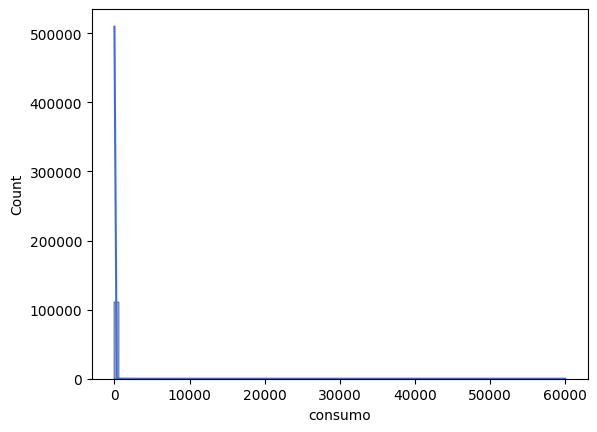

In [65]:
sns.histplot(df_merged['consumo'], bins=100, kde=True, color='royalblue')

# Modelamiento

In [84]:
from sklearn.preprocessing import StandardScaler

df_merged['fec_contab_documento'] = pd.to_datetime(df_merged['fec_contab_documento'])

In [85]:
df_merged['mes'] = df_merged['fec_contab_documento'].dt.month
df_merged['año'] = df_merged['fec_contab_documento'].dt.year

In [87]:
features = ['consumo', 'categoria_cliente', 'dias_fact', 'descrip_poblac_suministro', 'mes', 'año', 'viviendas']

data_encoded = pd.get_dummies(df_merged[features], drop_first=True)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_encoded)


In [94]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.01)
anomalies = iso_forest.fit_predict(scaled_data)

df_merged['anomalía'] = anomalies



In [97]:
y_scores = iso_forest.decision_function(scaled_data)

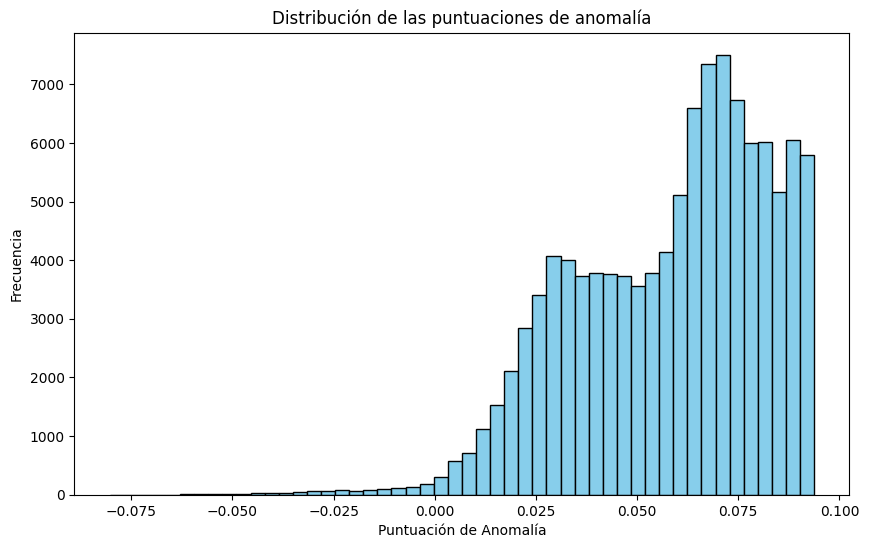

In [98]:
plt.figure(figsize=(10, 6))
plt.hist(y_scores, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribución de las puntuaciones de anomalía')
plt.xlabel('Puntuación de Anomalía')
plt.ylabel('Frecuencia')
plt.show()


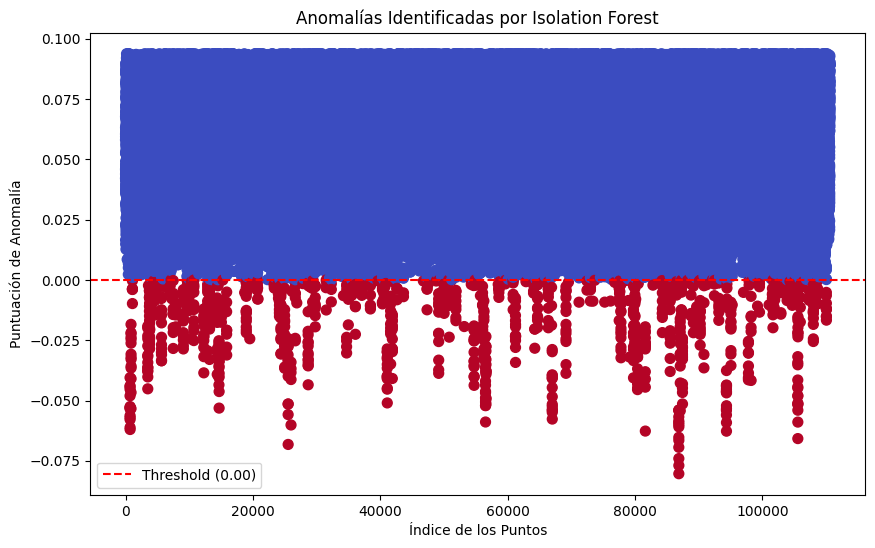

In [101]:
threshold = np.percentile(y_scores, 1)

y_pred_anomalies = (y_scores < threshold).astype(int)

plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_scores)), y_scores, c=y_pred_anomalies, cmap='coolwarm', s=50)
plt.axhline(y=threshold, color='r', linestyle='--', label=f'Threshold ({threshold:.2f})')
plt.title('Anomalías Identificadas por Isolation Forest')
plt.xlabel('Índice de los Puntos')
plt.ylabel('Puntuación de Anomalía')
plt.legend()
plt.show()

# Revisar clasificación

In [95]:
from sklearn.decomposition import PCA

X = data_encoded
if X.shape[1] > 2:
    pca = PCA(n_components=2)
    X = pca.fit_transform(X)

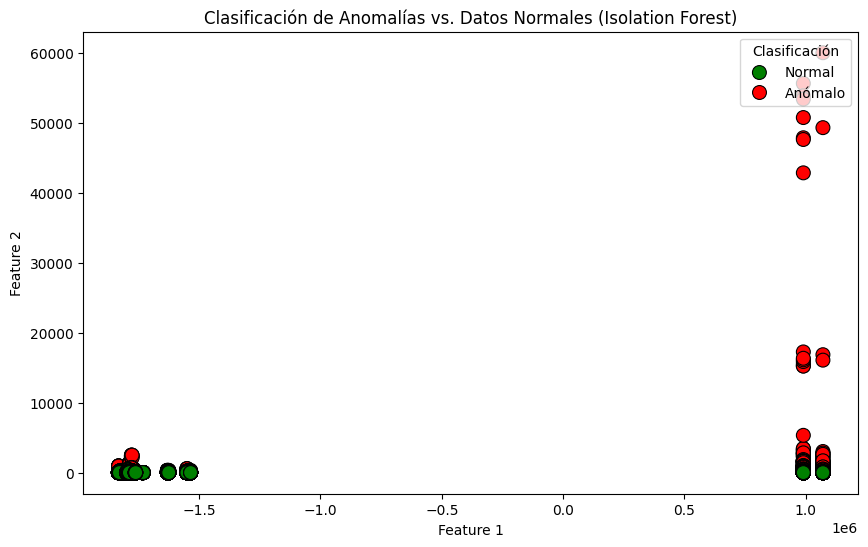

In [96]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=df_merged['anomalía'], palette={1: 'green', -1: 'red'}, s=100, edgecolor='k')
plt.title('Clasificación de Anomalías vs. Datos Normales (Isolation Forest)')
plt.xlabel('componente 1')
plt.ylabel('Componente 2')
plt.legend(title='Clasificación', loc='upper right', labels=['Normal', 'Anómalo'])
plt.show()